<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [24]:
'''dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]'''

number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

def data_preprocessing(data):
  dataout = (data/255.0).astype(np.float16)
  return dataout


In [ ]:
i = np.random.randint(0, X_train.shape[0])
sample = data_preprocessing(X_train)[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[0.443   0.6704  0.7217  0.7256  0.298   0.051   0.2627  0.678   0.847
  0.7295  0.533   0.3215  0.255   0.2118  0.3452  0.4038  0.5845  0.678
  0.796   0.8037  0.714   0.7764  0.682   0.4392  0.4197  0.4785  0.2864
  0.498   0.5254  0.6665 ]
 [0.6     0.4666  0.678   0.7217  0.102   0.04706 0.392   0.8433  0.8076
  0.741   0.753   0.3882  0.5215  0.4275  0.3098  0.565   0.816   0.647
  0.8354  0.788   0.655   0.4746  0.608   0.7646  0.7373  0.255   0.306
  0.2471  0.4941  0.8784 ]
 [0.502   0.4626  0.4785  0.302   0.306   0.4038  0.1686  0.847   0.7803
  0.82    0.7373  0.6274  0.647   0.612   0.3098  0.8276  0.749   0.8394
  0.855   0.7764  0.506   0.251   0.655   0.8315  0.6157  0.2903  0.408
  0.741   0.4158  0.6196 ]
 [0.498   0.6274  0.1216  0.      0.5215  0.4863  0.2942  0.6157  0.7217
  0.749   0.7803  0.7373  0.7295  0.396   0.5728  0.9136  0.5137  0.6626
  0.8037  0.749   0.4626  0.2783  0.8276  0.7725  0.5605  0.2864  0.7607
  0.847   0.541   0.5884 ]
 [0.596   0.1647  0.0

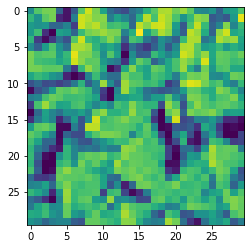

In [26]:
display = sample[55:85, 40:70]
plt.imshow(display.astype(np.float32))
print(display)

(40000, 128, 128, 1) (10000, 128, 128, 1)


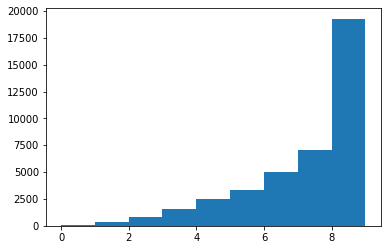

In [27]:
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)

#print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

def data_preprocessing2(data):
  dataout = (data/255.0)
  dataout = np.expand_dims(dataout, axis=3)
  return dataout

print(data_preprocessing2(X_train).shape, data_preprocessing2(X_test).shape)

# ***Pipeline X***

4 [[[ 1 -1 -1 -1]
  [ 3  0  2 -1]
  [-1 -1 -1  1]
  [-1  1 -1 -1]]]


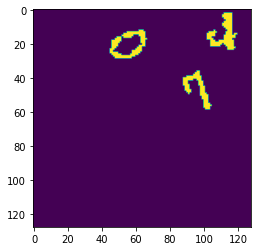

In [89]:
import cv2
def pipeline_X(data):
  dataout = []
  return dataout

plt.imshow(sample.astype(np.float32))
ret, black_white = cv2.threshold((sample*255).astype(np.uint8), 254, 255, 0)
plt.imshow(black_white.astype(np.float32))
contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours), hierarchy)

In [79]:
(sample*255).astype(np.uint8)

array([[172, 174, 178, ...,  92, 180, 131],
       [173, 179, 174, ...,  53,  84,  33],
       [168, 174, 183, ...,  88,   0,   0],
       ...,
       [ 87, 159, 175, ..., 136, 141,  91],
       [136, 177, 186, ..., 168, 133, 141],
       [115, 173, 160, ..., 160, 168, 167]], dtype=uint8)

In [48]:
sample

array([[0.6743, 0.682 , 0.698 , ..., 0.3608, 0.706 , 0.5137],
       [0.678 , 0.702 , 0.682 , ..., 0.2079, 0.3293, 0.1294],
       [0.6587, 0.682 , 0.718 , ..., 0.3452, 0.    , 0.    ],
       ...,
       [0.341 , 0.6235, 0.686 , ..., 0.533 , 0.5527, 0.357 ],
       [0.533 , 0.6943, 0.7295, ..., 0.6587, 0.5215, 0.5527],
       [0.451 , 0.678 , 0.6274, ..., 0.6274, 0.6587, 0.655 ]],
      dtype=float16)

# ***Keras Solution***

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [36]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  my_model.add(Conv2D(conv2d_2, kernel_size=(3,3), activation='relu'))
  my_model.add(MaxPool2D(pool_size=(2,2)))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu'))
  my_model.add(Dropout(dr))
  #my_model.add(Dense(3, activation='relu'))
  my_model.add(Dense(len(number_of_label[0]), activation='softmax'))

  #my_model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2], 1)))
  #my_model.add(Dense(128*128, activation='relu'))
  #my_model.add(Dense(len(number_of_label[0]), activation='softmax'))
  #my_model.add(Dense(1, activation='relu'))

  optimizerAdam = Adam(lr=0.0001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizerSGD,
                metrics=['accuracy'])

  #my_model.compile(loss='sparse_categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])
  
  return my_model

In [33]:
X_train_float = X_train.astype(np.float16)
Processed_X = tf.py_function(data_preprocessing2, inp=[X_train_float], Tout=tf.float16)

In [37]:
BATCH = 256
my_model = create_model(conv2d_1=128, str_1=2, conv2d_2=128, str_2=1, dense_node=64, dr=0.4)
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 63, 63, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 115200)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 115200)            460800    
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [38]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')


history = my_model.fit(
  Processed_X, Y_train,
  epochs=300, validation_split = 0.2, verbose=1,
  batch_size = BATCH, shuffle=True,
  callbacks=[early_stop, checkpoint])

Epoch 1/300
125/125 [==============================] - ETA: 0s - loss: 2.1458 - accuracy: 0.2022
Epoch 00001: val_accuracy improved from -inf to 0.26575, saving model to weight_model_cnn_best.h5
125/125 [==============================] - 73s 586ms/step - loss: 2.1458 - accuracy: 0.2022 - val_loss: 2.2216 - val_accuracy: 0.2657
Epoch 2/300
112/125 [=========================>....] - ETA: 6s - loss: 2.0301 - accuracy: 0.2356

KeyboardInterrupt: ignored

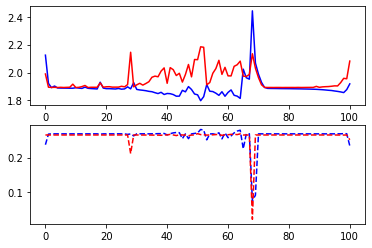

In [ ]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')